In [1]:
import pandas as pd
import numpy as np

In [67]:
#NGAMBIL DATA DARI LOKAL KOMPI

ggu = pd.read_excel(r'C:\Users\Wisnu Sugiyanto\ggu\ggu_sampel.xlsx')
ggu_df = pd.DataFrame(ggu)

ggu_df.head(5)
#ggu_df.groupby('keterangan').size()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,keterangan
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-785494469183617,-3.613626e-01,N,2025,24228,346,valid
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-10336659966,2.068697e+09,N,389,2962,3675,valid
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100165737267718,2.561939e+13,N,168,951,0,valid
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100491720635433,2.567629e+13,N,1659,11082,358,valid
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100104166,2.564386e+09,N,272,2021,3614,valid


In [68]:
#Menggunakan trip_duration dan dist_meters

X = ggu_df[['trip_duration','dist_meters']]
y = ggu_df['keterangan']
X

,trip_duration,dist_meters
0,2025,24228
1,389,2962
2,168,951
3,1659,11082
4,272,2021
...,...,...
995,144,398
996,944,9175
997,162,1531
998,21,282


In [69]:
#Split Data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30)
X_train

,trip_duration,dist_meters
802,538,3248
434,495,4334
900,1811,4949
137,480,2401
413,15,167
...,...,...
500,166203,3994
813,1790,16698
941,1963,14978
421,652,13967


In [70]:
#Pembuatan Model Menggunakan SVM

from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
#Training

training_prediction = clf.predict(X_train)
training_prediction


array(['valid', 'valid', 'buang', 'valid', 'valid', 'buang', 'valid',
       'buang', 'valid', 'valid', 'valid', 'buang', 'valid', 'valid',
       'valid', 'valid', 'valid', 'buang', 'valid', 'valid', 'valid',
       'buang', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'valid', 'valid', 'buang', 'buang', 'buang', 'valid', 'buang',
       'valid', 'buang', 'valid', 'valid', 'valid', 'valid', 'valid',
       'valid', 'buang', 'valid', 'buang', 'valid', 'buang', 'valid',
       'valid', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'buang', 'valid', 'valid', 'valid', 'valid', 'buang', 'valid',
       'valid', 'buang', 'valid', 'buang', 'valid', 'valid', 'buang',
       'valid', 'valid', 'valid', 'valid', 'valid', 'buang', 'valid',
       'buang', 'valid', 'valid', 'valid', 'buang', 'buang', 'buang',
       'valid', 'valid', 'valid', 'buang', 'valid', 'valid', 'valid',
       'buang', 'buang', 'valid', 'buang', 'valid', 'valid', 'valid',
       'buang', 'bua

In [72]:
#Testing

test_prediction = clf.predict(x_test)
test_prediction

array(['valid', 'buang', 'valid', 'valid', 'valid', 'buang', 'valid',
       'valid', 'valid', 'valid', 'valid', 'buang', 'buang', 'buang',
       'valid', 'valid', 'valid', 'valid', 'buang', 'valid', 'buang',
       'valid', 'valid', 'valid', 'buang', 'valid', 'valid', 'buang',
       'valid', 'valid', 'valid', 'valid', 'buang', 'valid', 'valid',
       'valid', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'buang', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'valid', 'buang', 'valid', 'valid', 'buang', 'valid', 'valid',
       'valid', 'valid', 'buang', 'valid', 'valid', 'valid', 'valid',
       'buang', 'valid', 'valid', 'valid', 'buang', 'buang', 'valid',
       'valid', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'valid', 'valid', 'buang', 'valid', 'valid', 'valid', 'valid',
       'buang', 'valid', 'valid', 'valid', 'valid', 'valid', 'valid',
       'valid', 'valid', 'valid', 'valid', 'valid', 'buang', 'valid',
       'valid', 'val

In [73]:
#Performance Test
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

       buang      1.000     1.000     1.000       164
       valid      1.000     1.000     1.000       536

    accuracy                          1.000       700
   macro avg      1.000     1.000     1.000       700
weighted avg      1.000     1.000     1.000       700

[[164   0]
 [  0 536]]


In [74]:
#Penerapan Pada Data Lengkap

ggu_all = pd.read_csv(r'C:\Users\Wisnu Sugiyanto\ggu\all-data_clean.csv')
ggu_all_df = pd.DataFrame(ggu_all)

data = ggu_all_df[['trip_duration','dist_meters']]
data.head(5)

,trip_duration,dist_meters
0,2025,24228
1,389,2962
2,168,951
3,1659,11082
4,272,2021


In [75]:
#Prediksi dan Gabung dengan data awal

prediction = clf.predict(data)
hasil = pd.DataFrame(prediction)
ggu_all_df['keterangan'] = hasil


In [160]:
#Membuat Perhitungan Persentase

df_size = pd.DataFrame(ggu_all_df.groupby(['vendor_id','keterangan']).size().to_frame('jumlah').reset_index())
df_size2= df_size.groupby(['vendor_id','keterangan','jumlah']).agg({'jumlah':'sum'})
df_size3= df_size2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_size4= df_size3.rename(columns={'jumlah':'persen'}).reset_index()
df_size4

,vendor_id,keterangan,jumlah,persen
0,Aguascalientes,buang,5,0.048421
1,Aguascalientes,valid,10321,99.951579
2,Aguascalientes UberX,buang,1,0.404858
3,Aguascalientes UberX,valid,246,99.595142
4,Ambato,buang,2,0.934579
...,...,...,...,...
166,Uruguay,valid,339,100.000000
167,Valledupar UberX,valid,11,100.000000
168,Valparaiso UberX,buang,1,12.500000
169,Valparaiso UberX,valid,7,87.500000


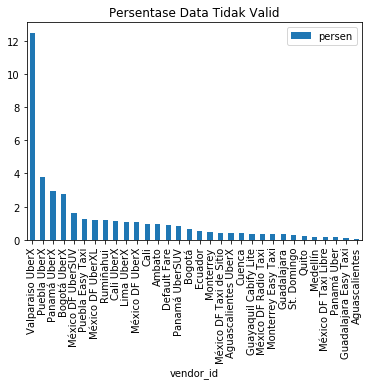

In [170]:
#Visualisasi Data Tidak Valid

import matplotlib.pyplot as plot
dt_buang =(df_size4.loc[df_size4['keterangan'] == 'buang'])
dt_buang = dt_buang.sort_values(by='persen',ascending=False)
dt_buang.plot.bar(x="vendor_id", y="persen", title="Persentase Data Tidak Valid");